# Das Multilayer Perceptron (MLP)
Ein Percepton/Neuron kann einfach Klassifizierunegn vornehmen, aber es kommt schnell an seine Grenzen.
Ein Neuron/Perceptron kann nur zwischen Klassen unterscheiden und keine komplexen Probleme lösen (XOR-Problem).
Diese Probleme kann man lösen, indem mehrere Neuronen verwendet-,und diese auf sogenannte Layer/Schichten verteilt werden.

![MLP](mlp.jpg)

Im Bild ist ein Multilayer Perceptron mit zwei Inputs (für zwei Merkmale), einer "verdeckten" Schicht (hidden layer) mit drei Neuronen und einem Output Neuron dargestellt

### Aufgabe 
Öffne folgenden [Link](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.06468&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&stepButton_hide=false&activation_hide=true&problem_hide=true&regularization_hide=true&batchSize_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&numHiddenLayers_hide=false)

Die aktuelle Simulation zeigt eine Klassifikation mit einem Neuron. Für die Klassifikation können vier verschiedne Datensätze gewählt werden.

- Für welche Datensätze können wir unser Modell mit einem Neuron verwenden?
- Füge einen "Hidden Layer" hinzu
- Lassen sich die "Circles" nun klassifizieren?
- Falls nicht, füge ein weiteres Neuron im "Hidden-Layer" hinzu
- Versuche für alle Datensätze ein passendes Modell zu finden

# Komplexeres Beispiel, welches mit einem Neuron nicht gelöst werden kann

## 1. Laden des Datensatzes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('kreise.csv')
data.head()

,Index,x1,x2,y
0,0,0.587183,0.568578,1.0
1,1,0.573165,0.481239,1.0
2,2,0.594269,0.509110,1.0
3,3,-0.857901,-0.533721,-1.0
4,4,-0.886041,0.445610,-1.0


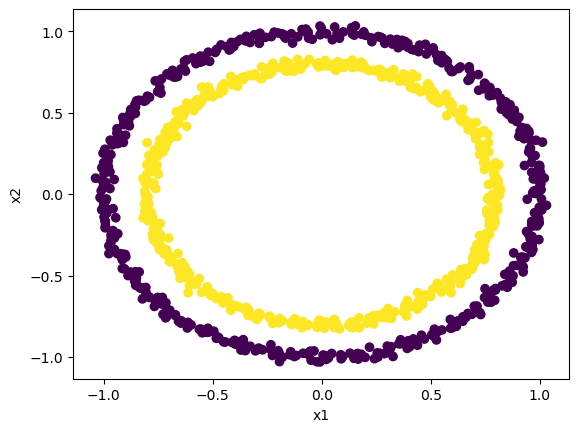

In [5]:
eigenschaften=['x1','x2']
x=data[eigenschaften].values
y=data.y.values
# plot data
plt.scatter(x[:, 0], x[:, 1],c=y )
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 2. Aufteilen in Train und Test

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
print("Anzahl der Traingsdaten:", x_train.shape[0])
print("Anzahl der betrachteten Merkmale:", x_train.shape[1])
print("Anzahl der Testdaten:", x_test.shape[0])

Anzahl der Traingsdaten: 750
Anzahl der betrachteten Merkmale: 2
Anzahl der Testdaten: 250


## 3. Erstellen eines Multlayer Perceptron als Modell
Mit Hilfe der Bibliothek Keras kann mit mit "add" ein weiterer Layer hinzugefügt werden.
Danach geben wir an, wieviele Neuronen der entsprechende Layer hat und welche Aktivierungsfunktion verwendet werden soll.
Im folgenden wir ein Modell mit drei Neuronen im Hidden-Layer und einem Neuron im Output-Layer erstellt.

Die Anzahl der Neuronen im Hidden-Layer kann nahezu beliebig gewählt werden!
Wichtig ist, dass die input_shape mit den Merkmalen/Eigenschaften übereinstimmt. Daher muss in der ersten Schicht die entsprechnende "input_dim" angegeben werden.
Es ist auch möglich, weitere Hidden-Layer hinzuzufügen.

Die Anzahl der Neuronen im Output-Layer ist durch die Anzahl der Klassen vorgegeben!
Gibt es zwei Klassen, wird nur ein Neuron im Output-Layer benötigt.
Soll eine Klassifizierung mit mehr als zwei Klassen erfolgen, muss die Anzahl der Klassen mit der Anzahl an Neuronen im Output-Laer übereinstimmen.

In [16]:
# Laden der Bibliotheken
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense



# Erstellen des gewünschten MLPS
model = Sequential()
model.add(Dense(8,activation="relu", name="hidden_layer_1",input_dim=2))  # Hidden Layer mit drei Neuronen, Input = 2 (da 2 Merkmale vorhanden)
# Die erste Zahl gibt die Anzahl der Neuronen in der Schicht an. Damit klar ist, wie viele verbindungen aus der Input Schicht kommen,
# müssen wir diese mit dem Parameter "input_dim" angeben
model.add(Dense(8,activation="relu",  name="hidden_layer_2"))
model.add(Dense(1, activation="tanh",name="output_layer") )  # Output Layer mit einem Neuron, tanh als Aktivierungsgsfunktion
# So führt man es Schicht für Schicht fort.
model.compile(loss='mse')
# Sind alle Schichten hinzugefügt, wird das Netz compiliert. Dabei muss angegeben werden, welche Fehlerfunktion angewendet werden soll
model.summary()  # Darstellung der Modell Übersicht

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 8)                 24        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 72        
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


Mit "model.summary" können wir eun eine "Zusammenfassung" ausgeben lassen.
Durch das Hinzufügen weiterer Schichten und Neuronen haben wir nun auch mehr Wichtungen, welche durch das Training angepasst und verändert werden.
Im weiteren Training werden 13 Parameter angepasst um den Fehler zu minimieren

## 4. Start des Trainings

In [17]:
# Start des Trainings
model.fit(x_train,y_train, epochs=150)

Epoch 1/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0595
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0373
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0260
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0159
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0074
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0001
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.9937
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9888
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9830
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9764
Epoch 11/150
24/24 [==============================] - 0s 1ms/step - loss: 0.9710
Epoch 12/150
24/24 [==============================] - 0s 1ms/step - loss: 0.9645
Epoch 13/150
24/24 [=================

## Validierung

In [13]:
# Erstellen einer Funktion, welche Testet, wieviel Prozent eines Datensatses richtig klassifiziert werden.
# Dazu muss das model angegeben werden, welches verwendet werden soll
# Daten mit Merkmalen (x) und die dazugehörigen Klassen/labels (y)
def test_model(model,X,Y):
    
    C=model.predict(X) # die Merkmale x werden hier vom Modell klassifiziert und die vorhergesagten Klassifizierungen werden in einer Variable gespeichert
    counter=0
    # 1 entspricht den Äpfeln
    # -1 entspricht den Birnen
    for i in range(Y.shape[0]):
        if C[i]>0:  # Wenn die "vorhersage" größer 0 ist, soll auf 1 gerundet werden
            C[i]=1
        else:
            C[i]=-1  # Wenn die "vorhersage" kleiner 0 ist, soll auf -1 gerundet werden
        if Y[i]==C[i]:  # Wenn die daraus resutlierende vorhersage mit der tatsächlichen Klasse entspricht, soll der counter um eins erhöht werden
            counter=counter+1

    print("Es wurden", counter/Y.shape[0]*100, "Prozent richtig klassifiziert")


In [46]:
test_model(model,x_test,y_test)

Es wurden 100.0 Prozent richtig klassifiziert


Bist du mit dem Ergebnis zufrieden?
Bringt ein weiteres Training bessere Ergebnisse?
Wenn nicht, könnte es helfen, die Anzahl der Neuronen im Hidden-Layer zu erhöhen?

### Aufgabe
- Lade den Datensatz "spirale.csv"
- Hast du für die Spirale in der Simulation bereits ein funktionierendes Modell gefunden?
- Implementiere dieses Modell mit Tensorflow und starte das Training
- Funktioniert dein Ansatz?